<a href="https://colab.research.google.com/github/HIEUJUNES/NHANDIENNHACCU/blob/main/NHACCU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/NHẠC CỤ TRUYỀN THỐNG/INSTRUMENTALS

/content/gdrive/MyDrive/NHẠC CỤ TRUYỀN THỐNG/INSTRUMENTALS


In [4]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [9]:
train_set = train_data.flow_from_directory('/content/gdrive/MyDrive/NHẠC CỤ TRUYỀN THỐNG/INSTRUMENTALS/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_data.flow_from_directory('/content/gdrive/MyDrive/NHẠC CỤ TRUYỀN THỐNG/INSTRUMENTALS/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 291 images belonging to 6 classes.
Found 273 images belonging to 6 classes.


In [10]:
train_set.class_indices

{'Sáo Trúc': 0,
 'Đàn Bầu': 1,
 'Đàn Nguyệt': 2,
 'Đàn Tranh': 3,
 'Đàn Tỳ Bà': 4,
 'Đàn Đá': 5}

In [11]:
test_set.class_indices

{'Sáo Trúc': 0,
 'Đàn Bầu': 1,
 'Đàn Nguyệt': 2,
 'Đàn Tranh': 3,
 'Đàn Tỳ Bà': 4,
 'Đàn Đá': 5}

In [12]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
10/10 [==============================] - 139s 13s/step - loss: 5.1956 - accuracy: 0.2234
Epoch 2/100
10/10 [==============================] - 3s 252ms/step - loss: 1.5396 - accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - 3s 255ms/step - loss: 1.2034 - accuracy: 0.4674
Epoch 4/100
10/10 [==============================] - 3s 257ms/step - loss: 1.0013 - accuracy: 0.5670
Epoch 5/100
10/10 [==============================] - 3s 254ms/step - loss: 0.8563 - accuracy: 0.6289
Epoch 6/100
10/10 [==============================] - 3s 256ms/step - loss: 0.7183 - accuracy: 0.6942
Epoch 7/100
10/10 [==============================] - 3s 260ms/step - loss: 0.8782 - accuracy: 0.6082
Epoch 8/100
10/10 [==============================] - 3s 259ms/step - loss: 0.6868 - accuracy: 0.7216
Epoch 9/100
10/10 [==============================] - 3s 295ms/step - loss: 0.7629 - accuracy: 0.7079
Epoch 10/100
10/10 [==============================] - 3s 265ms/step - loss: 0.5696 - accura

In [14]:
model.save('INSTRU.h5')

In [15]:
model_hoa = load_model('INSTRU.h5')

In [16]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.009944958612322807
Train Accuracy 0.9965635538101196


1/1 [==============================] - 0s 84ms/step
Đây là đàn: Đàn Bầu


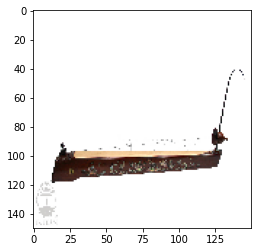

In [17]:
img = load_img('/content/đàn bàu.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
class_hoa=['Sáo Trúc','Đàn Bầu','Đàn Nguyệt','Đàn Tranh','Đàn Tỳ Bà','Đàn Đá']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là đàn:", class_hoa[a])